In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
import cv2

In [9]:
img = cv2.cvtColor(cv2.imread('img.jpeg'), cv2.COLOR_BGR2RGB)

In [10]:
img.shape

(720, 1280, 3)

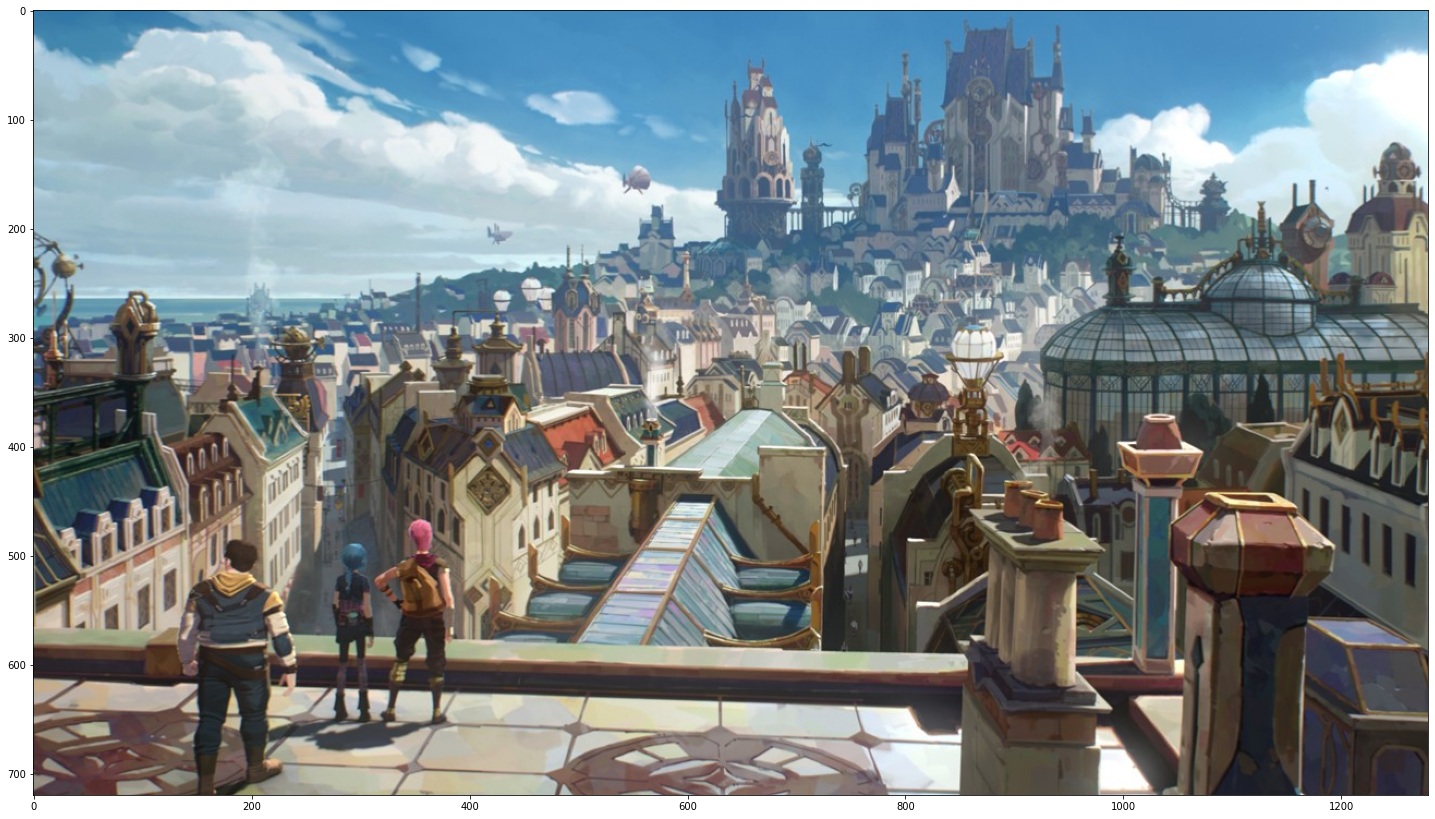

In [39]:
# show the image with matplotlib in large size
plt.figure(figsize=(25, 25))
plt.imshow(img)

In [40]:
r, g, b = cv2.split(img)

In [41]:
r, g, b = r / 255, g / 255, b / 255

In [53]:
pca_components = 200

pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [54]:
combined = np.array([reduced_r, reduced_g, reduced_b])

In [55]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [65]:
print(reconstructed_r)

[[0.19945581 0.19769386 0.20527566 ... 0.41431974 0.42754968 0.42597172]
 [0.20192197 0.19939722 0.20520641 ... 0.41710313 0.42884278 0.42711889]
 [0.21206987 0.2089981  0.21291842 ... 0.42176283 0.43159407 0.42820084]
 ...
 [0.30375436 0.30331257 0.2903113  ... 0.24230431 0.25393384 0.26724679]
 [0.3073586  0.30758828 0.29940484 ... 0.23433217 0.24393545 0.25764027]
 [0.31036595 0.31280714 0.30154771 ... 0.25910968 0.26625648 0.26562785]]


In [72]:
image_reconstructed = np.array([reconstructed_r, reconstructed_g, reconstructed_b]).transpose(1, 2, 0)
print(image_reconstructed)
plt.imsave('image_reconstructed.png', image_reconstructed)
plt.imshow(image_reconstructed)

[[[0.19945581 0.4833406  0.66969773]
  [0.19769386 0.48275012 0.66949949]
  [0.20527566 0.48254032 0.66871483]
  ...
  [0.41431974 0.66520022 0.81648819]
  [0.42754968 0.65776035 0.80256667]
  [0.42597172 0.65420348 0.79822412]]

 [[0.20192197 0.48453411 0.67196596]
  [0.19939722 0.48359825 0.67095208]
  [0.20520641 0.48357936 0.66959368]
  ...
  [0.41710313 0.66683031 0.81745666]
  [0.42884278 0.66002112 0.80347431]
  [0.42711889 0.65655642 0.79884278]]

 [[0.21206987 0.48564854 0.66926622]
  [0.2089981  0.48417565 0.66744185]
  [0.21291842 0.48410116 0.66534575]
  ...
  [0.42176283 0.67049668 0.81781011]
  [0.43159407 0.66461981 0.80554927]
  [0.42820084 0.66116218 0.80135521]]

 ...

 [[0.30375436 0.18477783 0.20923465]
  [0.30331257 0.18913375 0.21402485]
  [0.2903113  0.18361793 0.20974402]
  ...
  [0.24230431 0.17932664 0.14530912]
  [0.25393384 0.18838248 0.14594489]
  [0.26724679 0.2097592  0.16783191]]

 [[0.3073586  0.17574349 0.21488926]
  [0.30758828 0.18143316 0.22065393]


ValueError: Floating point image RGB values must be in the 0..1 range.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


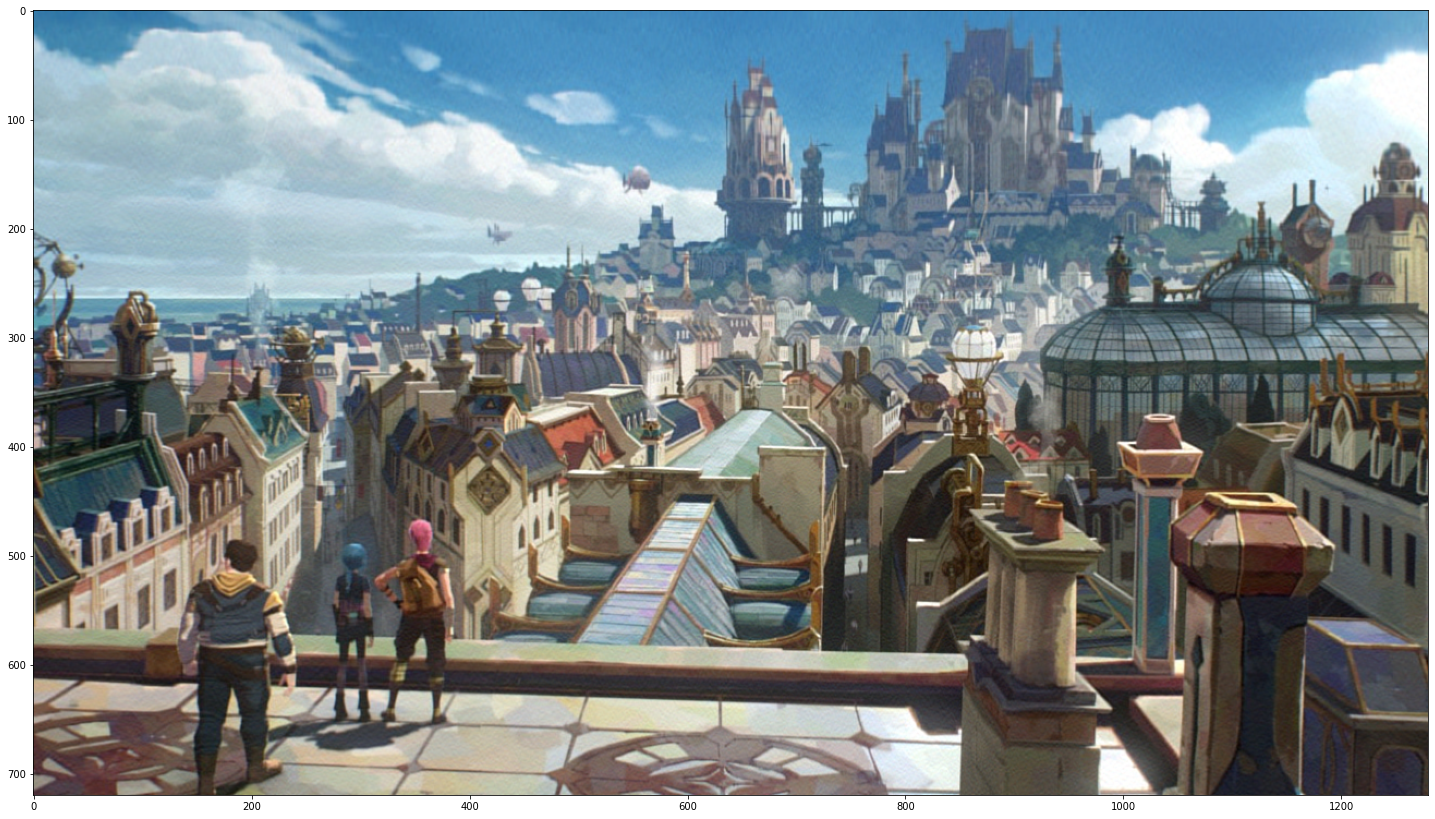

In [57]:
plt.figure(figsize=(25, 25))
plt.imshow(image_reconstructed)